# Re-make $dC_\ell/dw_0$, $dC_\ell/dw_a$ using $\partial^2 P/\partial w \partial k$ as a constant

In [1]:
import crosspower as cp
import FisherCl as fcl # branch quickCl
#import noiseCl as ncl
#import camb

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

IMPORT ERROR: /opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/quicklens/mpi.pyc (No module named pypar). Could not load pbs or pypar. MPI will not be used.


In [2]:
# load FisherMatrix objects
import FisherCl as fcl
import noiseCl as ncl
import crosspower as cp
import pickle

filehandler_lin = open('Fisher_7_16O.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

#filehandler_lin = open('Fisher_7_16N.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

filehandler_nln = open('Fisher_7_16M.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

#filehandler_nln = open('Fisher_7_16Ln0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 ('n0' indicates fix)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version



Fobj2 = pickle.load(filehandler_lin) 
Fobj4 = pickle.load(filehandler_nln) 


lmin = Fobj2.lmin
lmax = Fobj2.lmax
nBins = Fobj2.nBins
nMaps = Fobj2.nBins + 1
nParams = Fobj2.nParams
nCosParams = Fobj2.nParams - Fobj2.nBins
ells = Fobj2.ells
obsNames = Fobj2.obsNames
paramList = Fobj2.paramList

print Fobj2.obsList
print Fobj2.obsNames
print Fobj2.paramList

print Fobj2.Fij.shape
print Fobj2.FijTE.shape
print Fobj2.nParams
print Fobj2.nCosParams

print Fobj2.lmin
print Fobj2.lmax

lminP = Fobj2.lminP
lmaxP = Fobj2.lmaxP
print lminP,lmaxP

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  54.  55.  56.  57.  58.  59.  60.  61.
  62.  63.  64.  65.  66.  67.  72.  73.  74.  75.  76.  77.  78.  79.
  80.  81.  82.  83.  84.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 144. 145. 146. 147.
 148. 149. 150. 151. 152. 162. 163. 164. 165. 166. 167. 168. 169. 180.
 181. 182. 183. 184. 185. 186. 198. 199. 200. 201. 202. 203. 216. 217.
 218. 219. 220. 234. 235. 236. 237. 252. 253. 254. 270. 271. 288.]
['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 'k,g5', 'k,g6', 'k,g7', 'k,g8', 'k,g9', 'k,g10', 'k,g11', 'k,g12', 'k,g13', 'k,g14', 'k,g15', 'k,g16', 'g1,g1', 'g1,g2', 'g1,g3', 'g1,g4', 'g1,g5', 'g1,g6', 'g1,g7', 'g1,g8', 'g1,g9',

In [3]:
# get copies of the derivatives from the objects
crossClsPlus2 = np.copy(Fobj2.crossClsPlus)
crossClsMinus2 = np.copy(Fobj2.crossClsMinus)
crossClsPPlus2 = np.copy(Fobj2.crossClsPPlus)
crossClsPMinus2 = np.copy(Fobj2.crossClsPMinus)
dClVecs2 = np.copy(Fobj2.dClVecs)
dClVecsP2 = np.copy(Fobj2.dClVecsP)

crossClsPlus4 = np.copy(Fobj4.crossClsPlus)
crossClsMinus4 = np.copy(Fobj4.crossClsMinus)
crossClsPPlus4 = np.copy(Fobj4.crossClsPPlus)
crossClsPMinus4 = np.copy(Fobj4.crossClsPMinus)
dClVecs4 = np.copy(Fobj4.dClVecs)
dClVecsP4 = np.copy(Fobj4.dClVecsP)

print crossClsPlus2.shape,crossClsPlus4.shape
print crossClsMinus2.shape,crossClsMinus4.shape
print dClVecs2.shape, dClVecs4.shape

print crossClsPPlus2.shape,crossClsPPlus4.shape
print crossClsPMinus2.shape,crossClsPMinus4.shape
print dClVecsP2.shape, dClVecsP4.shape

(17, 17, 9, 2999) (17, 17, 9, 2999)
(17, 17, 9, 2999) (17, 17, 9, 2999)
(153, 25, 2999) (153, 25, 2999)
(2, 2, 9, 4999) (2, 2, 9, 4999)
(2, 2, 9, 4999) (2, 2, 9, 4999)
(3, 9, 4999) (3, 9, 4999)


In [4]:
nMapsP = 2 # should match above

# Re-make w derivatives

In [5]:
import camb 

# get MatterPower objects
# get params for MatterPower from FisherMatrix:
def getPk(Fobj):
    return cp.MatterPower(nz=Fobj.nz,AccuracyBoost=Fobj.AccuracyBoost,nonlinear=Fobj.nonlinear,**Fobj.cosParams)
def getWin(Fobj,myPk):
    return cp.Window(myPk,zmin=Fobj.zmin,zmax=Fobj.zmax,nBins=Fobj.nBins,
               biasK=cp.ones,biasG=cp.byeBias,dndzMode=Fobj.dndzMode,z0=Fobj.z0,
               doNorm=Fobj.doNorm,useWk=Fobj.useWk,BPZ=Fobj.BPZ,binSmooth=Fobj.binSmooth,
               biasByBin=Fobj.biasByBin)

# set Halofit version
print 'setting Halofit to Casarini (Halofit ver. 7)'
camb.set_halofit_version('casarini')

print 'get linear P(k)...'
myPk2 = getPk(Fobj2)
print 'get nonlinear P(k)...'
myPk4 = getPk(Fobj4)

#chiOfZ2 = myPk2.getChiofZ()
#chiOfZ4 = myPk4.getChiofZ()

print 'done.'

setting Halofit to Casarini (Halofit ver. 7)
get linear P(k)...
neutrino_hierarchy =  degenerate
starting makePkInterp.


finishing makePkInterp.
get nonlinear P(k)...
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
done.


In [6]:
print Fobj2.dndzMode,Fobj4.dndzMode
print Fobj2.nonlinear,Fobj4.nonlinear

2 2
False True


In [7]:
print paramList
print paramList[7:9]
for cParamNum in range(7,9):
    print paramList[cParamNum]

['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'w', 'wa', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16']
['w', 'wa']
w
wa


In [8]:
# grab some code from FisherCl
tophatBins = True
AccuracyBoost = 3
lpa = 5.0 # set_for_lmax also sets lensing 
#get the total lensed CMB power spectra versus unlensed
#myClName = 'total'
myClName = 'unlensed_scalar'

# parameters list:
# step sizes for discrete derivatives: must correspond to paramList entries!
#   from Allison et. al. (2015) Table III.
nCosParams = 9 # 6 LCDM + Mnu + w0 + wa
paramList = ['ombh2','omch2','cosmomc_theta',  'As', 'ns','tau','mnu', 'w', 'wa']
deltaP =    [ 0.0008, 0.0030,      0.0050e-2,0.1e-9,0.010,0.020,0.020,0.05,0.025] #mnu one in eV

# cut deltaP in half to match Byeonghee's step sizes
deltaP = np.array(deltaP)/2.0
    

print 'creating modified parameter lists . . . '
myParams = Fobj2.cosParams
myParamsUpper = []
myParamsLower = []
for cParamNum in range(nCosParams):
  # add parameter dictionary to lists; HAVE TO BE COPIES!!!
  myParamsUpper.append(myParams.copy())
  myParamsLower.append(myParams.copy())
  # modify parameter number cParamNum in ditionaries
  myParamsUpper[cParamNum][paramList[cParamNum]] += deltaP[cParamNum]
  myParamsLower[cParamNum][paramList[cParamNum]] -= deltaP[cParamNum]


creating modified parameter lists . . . 


In [9]:
# load data needed for P(z,k) scaling
myZs, myKs, dPdw0_ratio = np.load('dPdw0_ratio.npy')
myZs, myKs, dPdwa_ratio = np.load('dPdwa_ratio.npy')
print 'done.'

done.


In [10]:
# create interpolation functions for them
from scipy.interpolate import RectBivariateSpline
dPdw0_interp = RectBivariateSpline(myZs,myKs,dPdw0_ratio)
dPdwa_interp = RectBivariateSpline(myZs,myKs,dPdwa_ratio)

print 'done.'

done.


In [11]:
print paramList[7]

w


In [12]:
if paramList[7] == 'w':
    print 'yup'

yup


In [13]:
# create local versions of getCl, getCrossCls that forces dP/dw to be constant
# allow option to fix P(k,z) or chi

from scipy.interpolate import UnivariateSpline

def getCl(myPk,myPk2,myWin,binNum1=0,binNum2=0,cor1=cp.Window.kappa,cor2=cp.Window.kappa,
          lmin=2,lmax=2500,useInterp=True,pName='paramName'):
  """
    Purpose: get angular power spectrum
    Inputs:
      myPk: a MatterPower object; the one for chi(z)
      myPk2: the one that P(k,z) is taken from
      myWin: a Window object that was made with the same MatterPower object (myPk)
      binNum1,binNum2: index indicating which bin to use
        If myWin.dndzMode = 1:
          integer in {0,1,2,3,4,5}
          curves from fig.3 of Crocce et al 2016.
        if myWin.dndzMode = 2:
          integer in {0,1,...,nBins-1,nBins}
        Index=0 indicates sum of all other curves
      cor1,cor2: the names of the two fields to cross-correlate
        must be Window.kappa or Window.galaxies
        Default: Window.kappa
      lmin,lmax: lowest,highest ell to return.
      useInterp: set to true to only do some ell values, and interpolate
        the rest
        Default: True
    Modification:
      Modified to take two input MatterPower objects, and use one for chi(z), the other for P(k,z); ZK, 2018.07.26
    Returns: 
      ell,  the ell values (same length as Cl array)
      Cl, the power spectrum array
  """

  # confirm inputs
  def wincheck(winfunc,num):
    if winfunc == cp.Window.kappa:
      if num == 1:
        print 'window ',num,': kappa ',binNum1
      else:
        print 'window ',num,': kappa ',binNum2
    elif winfunc == cp.Window.galaxies:
      if num == 1:
        print 'window ',num,': galaxies ',binNum1
      else:
        print 'window ',num,': galaxies ',binNum2
    else:
      print 'error with input'
      return 0
    return 1
  
  if wincheck(cor1,1)==0: return 0,0
  if wincheck(cor2,2)==0: return 0,0
  
  # get matter power spectrum P_k^delta
  PK,chistar,chis,dchis,zs,dzs,pars = myPk.getPKinterp()
  PK2,chistar2,chis2,dchis2,zs2,dzs2,pars2 = myPk2.getPKinterp()
    
  # modify PK2 for constant dP/dw0 or constant dP/dwa
  if pName == 'w':
    print 'parameter w0'
    PKmod = lambda z, k : dPdw0_interp(z,k,grid=False)*PK2.P(z,k,grid=False) 
  elif pName == 'wa':
    print 'parameter wa'
    PKmod = lambda z, k : dPdwa_interp(z,k,grid=False)*PK2.P(z,k,grid=False)
  else:
    PKmod = lambda z, k : PK2.P(z,k,grid=False)


  # get window functions
  winFunc1=cor1(myWin,binNum1)
  winFunc2=cor2(myWin,binNum2)
  win1 = winFunc1(zs)
  win2 = winFunc2(zs)

  #Do integral over chi
  if useInterp and lmax <= 3000:
    # define ell values to be used 
    #   (same used in notebook "getCl interpolation testing")
    ells1 = np.arange(10)*2+10
    ells2 = np.arange(4)*5+30
    ells3 = np.arange(5)*10+50
    ells4 = np.arange(20)*25+100
    ells5 = np.arange(20)*70+600
    ells6 = np.arange(11)*100+2000 # switch 11 to 31 to extend from 3000 to 5000
    ellsSet = np.append(ells1,np.append(ells2,np.append(ells3,
        np.append(ells4,np.append(ells5,ells6)))))
    #print 'ell set: ',ellsSet
  else:
    if lmax > 3000:
        print 'warning! lmax>3000 found; Cl interpolation not being done.'
    ellsSet = np.arange(lmin,lmax+1, dtype=np.float64)

  Cells = np.zeros(ellsSet.shape)
  w = np.ones(chis.shape) #this is just used to set to zero k values out of range
  for i, l in enumerate(ellsSet):
    k=(l+0.5)/chis
    w[:]=1
    w[k<1e-4]=0
    w[k>=myPk.kmax]=0
    #Cells[i] = np.dot(dchis, w*PK.P(zs, k, grid=False)*win1*win2/(chis**2))
    Cells[i] = np.dot(dchis, w*PKmod(zs, k)*win1*win2/(chis**2))

  if useInterp:
    ls = np.arange(lmin,lmax+1, dtype=np.float64)
    y_spl = UnivariateSpline(ellsSet,Cells,s=0,k=4)
    cl = y_spl(ls)   
  else:
    ls = ellsSet
    cl = Cells

  return ls, cl


def getCrossCls(paramList,myParams,myPk,lmin,lmax,nBins,Fobj,tophatBins=True):
    """
        Purpose:
            get the crossCls for kappa, galaxies
        Inputs:
            paramList: like FisherMatrix.paramList, but only contains parameter
                names for those which are to be varied
                Note: a list of length 1 will cause a differently shaped array 
                to be returned
            myParams: a list of lists of parameters like FisherMatrix.cosParams
                This list must have the same length as paramList
            myPk: a MatterPower object

            nBins: number of redshift bins being used (should be nMaps-1)
            lmin,lmax: min,max ell value to use
            Fobj: contains various settings to copy
            tophatBins: set to True to use tophat-shaped, non-overlapping bins
        Modification:
            Pulled out of FisherCl.FisherMatrix; modified to use two cp.MatterPower objects; 
                Added Fobj to parameter list since not part of an object anymore; ZK,2018.07.26
        Returns:
            crossCls: numpy array of shape (nMaps,nMaps,nCosParams,lmax)
              unless the lenth of paramList is 1, then shape will be 
              (nMaps,nMaps,lmax)
    """
    nCosParams = paramList.__len__()
    nMaps = nBins+1

    crossCls = np.zeros((nMaps,nMaps,nCosParams,lmax-lmin+1))
    for cParamNum in range(nCosParams):
        print 'calculating MatterPower and Window objects for ',\
              paramList[cParamNum], ' derivative . . . '

        myPks = cp.MatterPower(nz=Fobj.nz,AccuracyBoost=Fobj.AccuracyBoost,
                               nonlinear=Fobj.nonlinear,**myParams[cParamNum])
        # myWins should use the MatterPower object that goes into the first position in getCl
        #myWins = cp.Window(myPk,zmin=Fobj.zmin,zmax=Fobj.zmax,
        myWins = cp.Window(myPks,zmin=Fobj.zmin,zmax=Fobj.zmax,
                           nBins=Fobj.nBins,biasK=cp.ones,biasG=cp.byeBias,
                           dndzMode=Fobj.dndzMode,z0=Fobj.z0,doNorm=Fobj.doNorm,
                           useWk=Fobj.useWk,BPZ=Fobj.BPZ,
                           binSmooth=Fobj.binSmooth,biasByBin=Fobj.biasByBin)

        # save pars for use in primary CMB
        # it would be nice to restore this functionality 
        #  but global DE settings make this hard
        #myParsUpper.append(myPksUpper.pars)
        #myParsLower.append(myPksLower.pars)

        for map1 in range(nMaps):
          if map1==0:
            cor1 = cp.Window.kappa
          else:
            cor1 = cp.Window.galaxies
          for map2 in range(map1,nMaps):
            print '  starting angular cross power spectrum ',map1,', ',map2,'... '
            if map2==0:
              cor2 = cp.Window.kappa
            else:
              cor2 = cp.Window.galaxies
            # since nonoverlapping bins have zero correlation use this condition:
            if map1==0 or map1==map2 or not tophatBins:
              #ells,Cls = cp.getCl(myPks,myWins,binNum1=map1,binNum2=map2,
              #                    cor1=cor1,cor2=cor2,lmin=lmin,lmax=lmax)
                
              # modified to use first Pk argument for chi(z), second for P(k)
              #ells,Cls = getCl(myPks,myPk,myWins,binNum1=map1,binNum2=map2,
              ells,Cls = getCl(myPks,myPks,myWins,binNum1=map1,binNum2=map2, #kludge to vary both
                                  cor1=cor1,cor2=cor2,lmin=lmin,lmax=lmax,pName=paramList[cParamNum])
              # now reversed:
              #ells,Cls = getCl(myPk,myPks,myWins,binNum1=map1,binNum2=map2,
              #                    cor1=cor1,cor2=cor2,lmin=lmin,lmax=lmax,pName=paramList[cParamNum])
              
              crossCls[map1,map2,cParamNum] = Cls
              crossCls[map2,map1,cParamNum] = Cls #symmetric

        # ditch the MatterPower and Window objects - wait, isn't this automatic?
        del myPks
        del myWins

    # reshape for unperterbed version
    if nCosParams == 1:
        crossCls = np.reshape(crossCls,(nMaps,nMaps,lmax-lmin+1))
    return crossCls



In [14]:
print paramList[7:9]

['w', 'wa']


In [15]:
# get the perturbed versions
print 'starting upper spectra for numeric derivatives . . . '
crossClsPlus_ww2 = getCrossCls(paramList[7:9],myParamsUpper[7:9],
                                     myPk2,
                                     lmin,lmax,nBins,Fobj2,tophatBins=tophatBins)    
print 'starting lower spectra for numeric derivatives . . . '
crossClsMinus_ww2 = getCrossCls(paramList[7:9],myParamsLower[7:9],
                                      myPk2,
                                      lmin,lmax,nBins,Fobj2,tophatBins=tophatBins)

print 'done.'

starting upper spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  w  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bG

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
parameter w0
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power 

calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
parameter wa
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power 

starting lower spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  w  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bG

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
parameter w0
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power 

calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
parameter wa
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power 

In [16]:
lminP = Fobj2.lminP
print lminP
lmaxP = Fobj2.lmaxP
print lmaxP

2
5000


In [17]:
"""
print 'starting upper spectra for numeric derivatives . . . '
crossClsPPlus_ww2  = getCrossClsP(paramList[7:9],myParamsUpper[7:9],
                                   myPk2,
                                   nMaps=nMapsP,lmax=lmaxP,lpa=lpa,
                                   myClName=myClName,
                                   AccuracyBoost=AccuracyBoost)
print 'starting lower spectra for numeric derivatives . . . '
crossClsPMinus_ww2 = getCrossClsP(paramList[7:9],myParamsLower[7:9],
                                   myPk2,
                                   nMaps=nMapsP,lmax=lmaxP,lpa=lpa,
                                   myClName=myClName,
                                   AccuracyBoost=AccuracyBoost)
"""
print 'done.'

done.


In [18]:
# set Halofit version
#print 'setting Halofit to Casarini (Halofit ver. 7)'
#camb.set_halofit_version('casarini')

print 'starting upper spectra for numeric derivatives . . . '
crossClsPlus_ww4 = getCrossCls(paramList[7:9],myParamsUpper[7:9],
                                     myPk4,
                                     lmin,lmax,nBins,Fobj4,tophatBins=tophatBins)    
print 'starting lower spectra for numeric derivatives . . . '
crossClsMinus_ww4 = getCrossCls(paramList[7:9],myParamsLower[7:9],
                                      myPk4,
                                      lmin,lmax,nBins,Fobj4,tophatBins=tophatBins)

print 'done.'

starting upper spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  w  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.


finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  3 , binBGs:  1.5057510000145304
calculating window  4 ... 
normalizedDNDZ:  [0.

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
parameter w0
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power 

calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
parameter wa
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power 

starting lower spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  w  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bG

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
parameter w0
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power 

calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538517
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.3133214947467855
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
parameter wa
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power 

In [19]:
# set Halofit version
#print 'setting Halofit to Casarini (Halofit ver. 7)'
#camb.set_halofit_version('casarini')
"""
print 'starting upper spectra for numeric derivatives . . . '
crossClsPPlus_ww4  = getCrossClsP(paramList[7:9],myParamsUpper[7:9],
                                   myPk4,
                                   nMaps=nMapsP,lmax=lmaxP,lpa=lpa,
                                   myClName=myClName,
                                   AccuracyBoost=AccuracyBoost)
print 'starting lower spectra for numeric derivatives . . . '
crossClsPMinus_ww4 = getCrossClsP(paramList[7:9],myParamsLower[7:9],
                                   myPk4,
                                   nMaps=nMapsP,lmax=lmaxP,lpa=lpa,
                                   myClName=myClName,
                                   AccuracyBoost=AccuracyBoost)
"""
print 'done.'

done.


In [20]:
print crossClsPlus2.shape,crossClsPlus4.shape
print crossClsMinus2.shape,crossClsMinus4.shape
print dClVecs2.shape, dClVecs4.shape

#print crossClsPPlus2.shape,crossClsPPlus4.shape
#print crossClsPMinus2.shape,crossClsPMinus4.shape
#print dClVecsP2.shape, dClVecsP4.shape

print crossClsPlus_ww2.shape,crossClsPlus_ww4.shape
print crossClsMinus_ww2.shape,crossClsMinus_ww4.shape

#print crossClsPPlus_ww2.shape,crossClsPPlus_ww4.shape
#print crossClsPMinus_ww2.shape,crossClsPMinus_ww4.shape


(17, 17, 9, 2999) (17, 17, 9, 2999)
(17, 17, 9, 2999) (17, 17, 9, 2999)
(153, 25, 2999) (153, 25, 2999)
(17, 17, 2, 2999) (17, 17, 2, 2999)
(17, 17, 2, 2999) (17, 17, 2, 2999)


In [21]:
# grab some code from FisherCl
nMapsP = 2 #probably


# get derivatives wrt parameters
print 'starting creation of C_l derivatives... '

# get dC_l^munu/da_i (one vector of derivatives of C_ls for each param a_i)
# store as matrix with additional dimension for a_i)
# uses same (shortened) nCls as self.covar and self.obsList
nCls = nMaps*(nMaps+1)/2
#self.dClVecs = np.empty((nCls, self.nParams, lmax-lmin+1))
#Clzeros = np.zeros(lmax-lmin+1) # for putting into dClVecs when needed
for map1 in range(nMaps):
  print 'starting derivative set ',map1+1,' of ',nMaps,'... '
  for map2 in range(map1,nMaps):
    mapIdx  = map1*nMaps+map2 -map1*(map1+1)/2  
                               # mapIdx = map index
    # don't need dCl/db for this (omitted)
    
    # next do numerical derivs wrt nuLCDM params
    #for pIdx in range(nCosParams):
    for pIdx in range(7,9):
      dClPlus  = crossClsPlus_ww2[map1,map2,pIdx-7]
      dClMinus = crossClsMinus_ww2[map1,map2,pIdx-7]
      dClVecs2[mapIdx, pIdx] = (dClPlus-dClMinus)/(2*deltaP[pIdx])
      dClPlus  = crossClsPlus_ww4[map1,map2,pIdx-7]
      dClMinus = crossClsMinus_ww4[map1,map2,pIdx-7]
      dClVecs4[mapIdx, pIdx] = (dClPlus-dClMinus)/(2*deltaP[pIdx])

nClsP = nMapsP*(nMapsP+1)/2
#dClVecsP = np.empty((nClsP, self.nCosParams, lmaxP-lminP+1))
"""
for map1 in range(nMapsP):
    print 'starting primary CMB derivative set ',map1+1,' of ',nMapsP,'... '
    for map2 in range(map1,nMapsP):
        mapIdx  = map1*nMapsP+map2 -map1*(map1+1)/2  # mapIdx = map index
        #for pIdx in range(nCosParams):
        for pIdx in range(7,9):
            dClPlus  = crossClsPPlus_ww2[map1,map2,pIdx-7,lminP:]
            dClMinus = crossClsPMinus_ww2[map1,map2,pIdx-7,lminP:]
            dClVecsP2[mapIdx, pIdx] = (dClPlus-dClMinus)/(2*deltaP[pIdx])
            dClPlus  = crossClsPPlus_ww4[map1,map2,pIdx-7,lminP:]
            dClMinus = crossClsPMinus_ww4[map1,map2,pIdx-7,lminP:]
            dClVecsP4[mapIdx, pIdx] = (dClPlus-dClMinus)/(2*deltaP[pIdx])
"""
print 'done.'

starting creation of C_l derivatives... 
starting derivative set  1  of  17 ... 
starting derivative set  2  of  17 ... 
starting derivative set  3  of  17 ... 
starting derivative set  4  of  17 ... 
starting derivative set  5  of  17 ... 
starting derivative set  6  of  17 ... 
starting derivative set  7  of  17 ... 
starting derivative set  8  of  17 ... 
starting derivative set  9  of  17 ... 
starting derivative set  10  of  17 ... 
starting derivative set  11  of  17 ... 
starting derivative set  12  of  17 ... 
starting derivative set  13  of  17 ... 
starting derivative set  14  of  17 ... 
starting derivative set  15  of  17 ... 
starting derivative set  16  of  17 ... 
starting derivative set  17  of  17 ... 
done.


# Compare old and new derivative versions

In [22]:
nToPlot = 17 # kk and kg at beginning of array

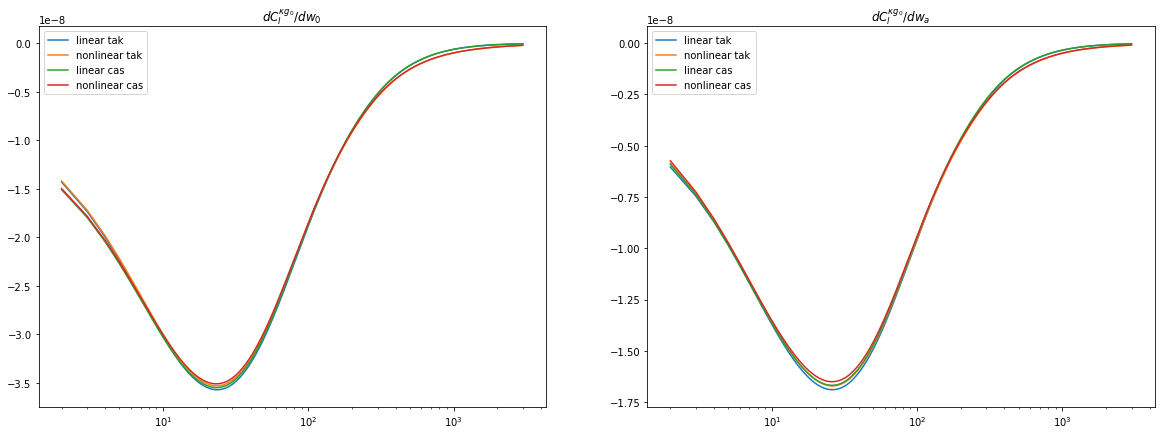

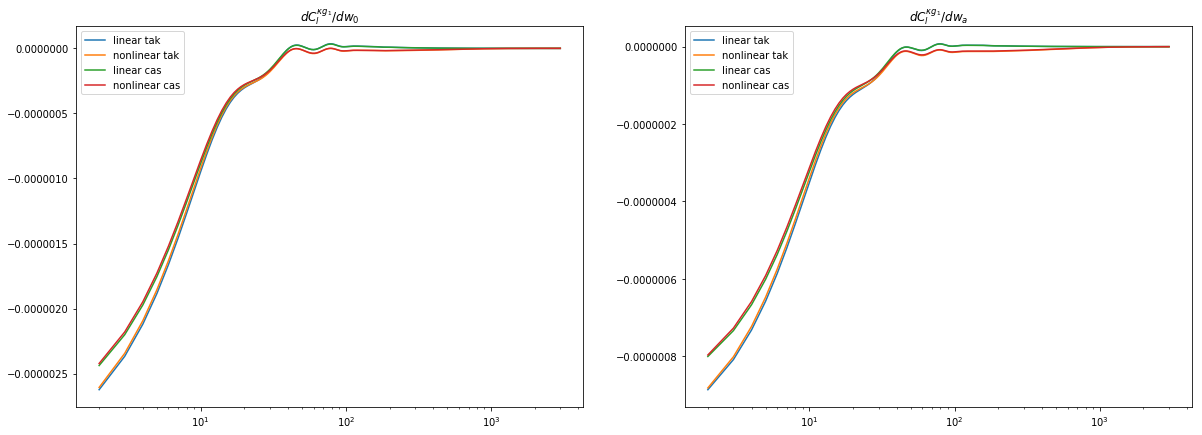

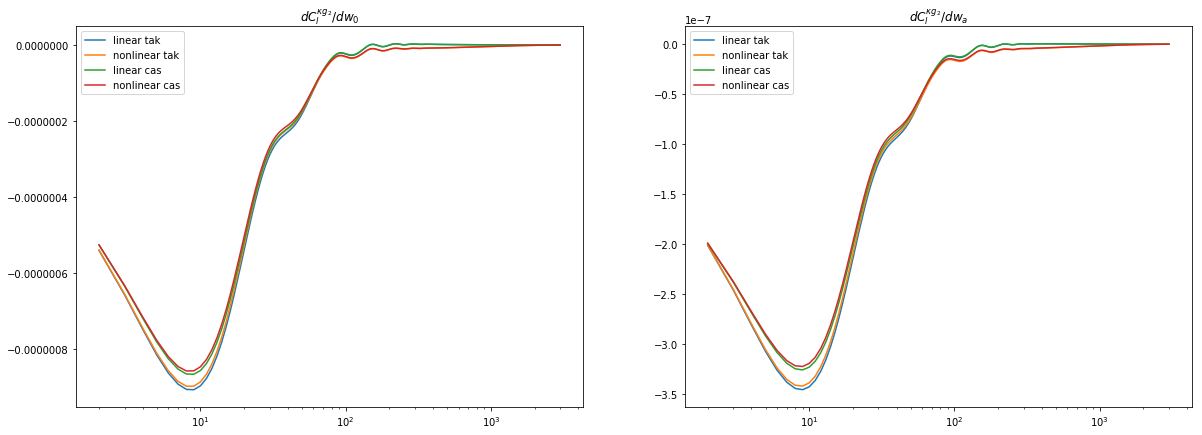

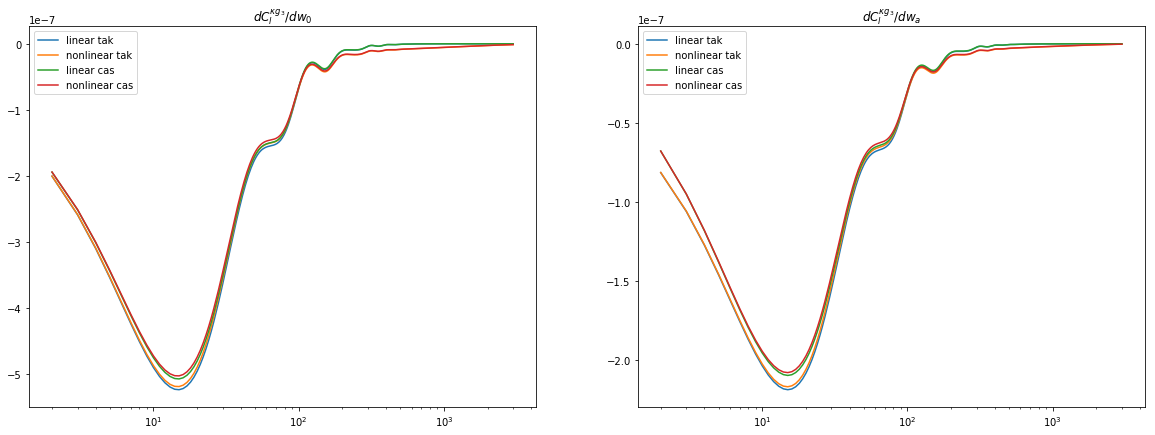

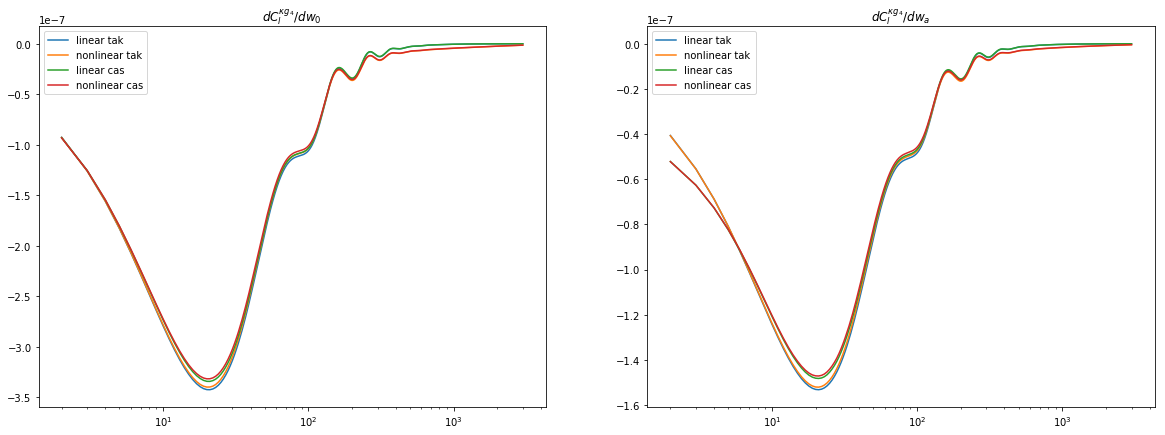

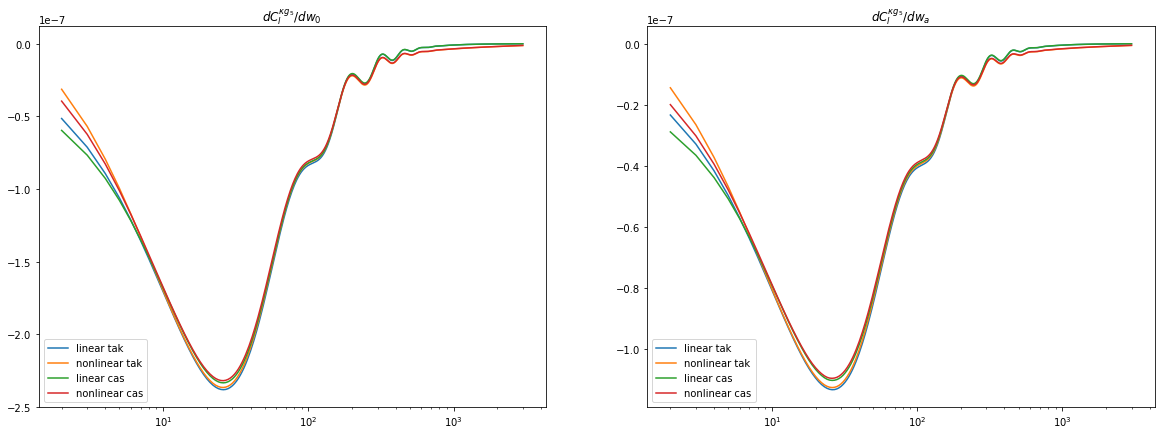

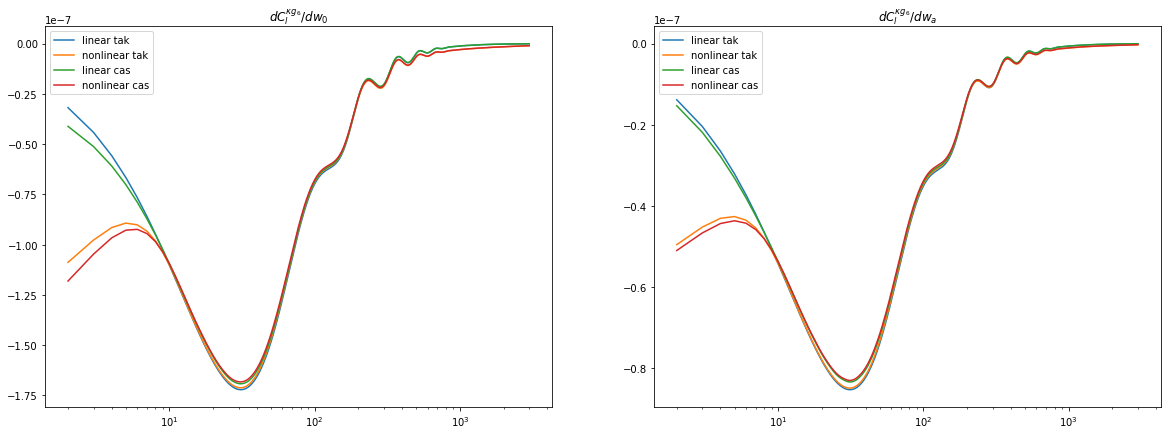

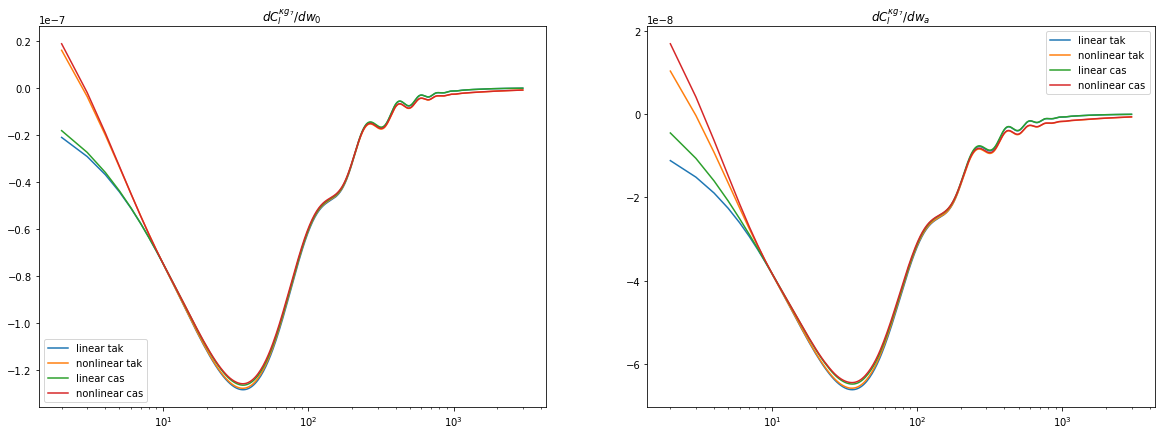

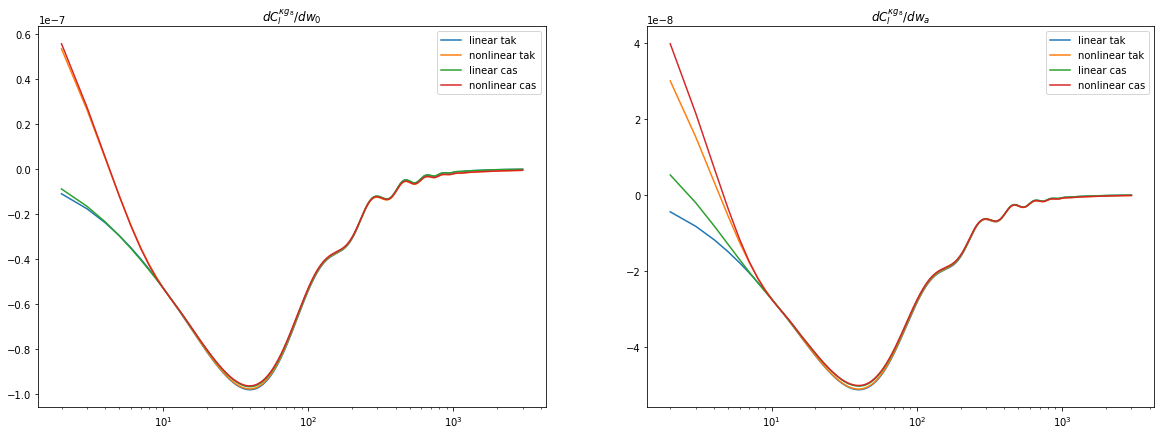

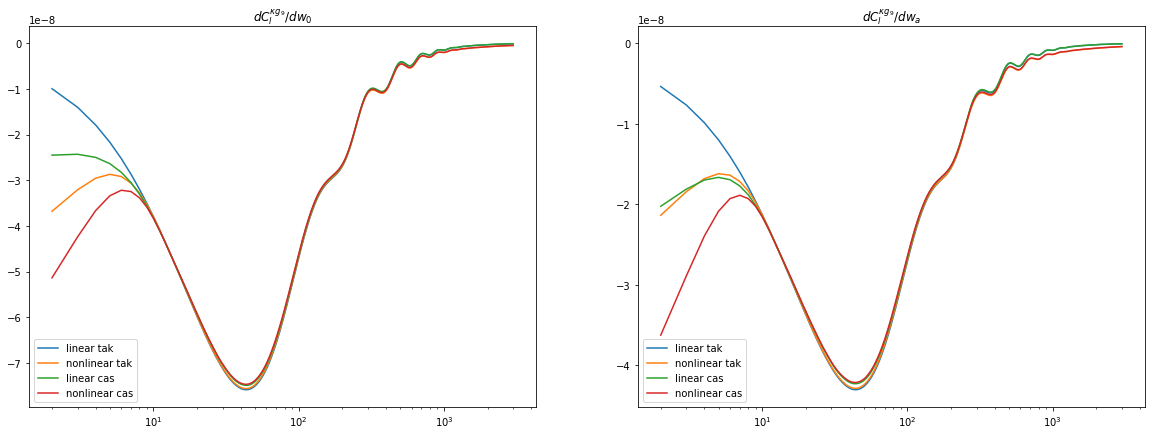

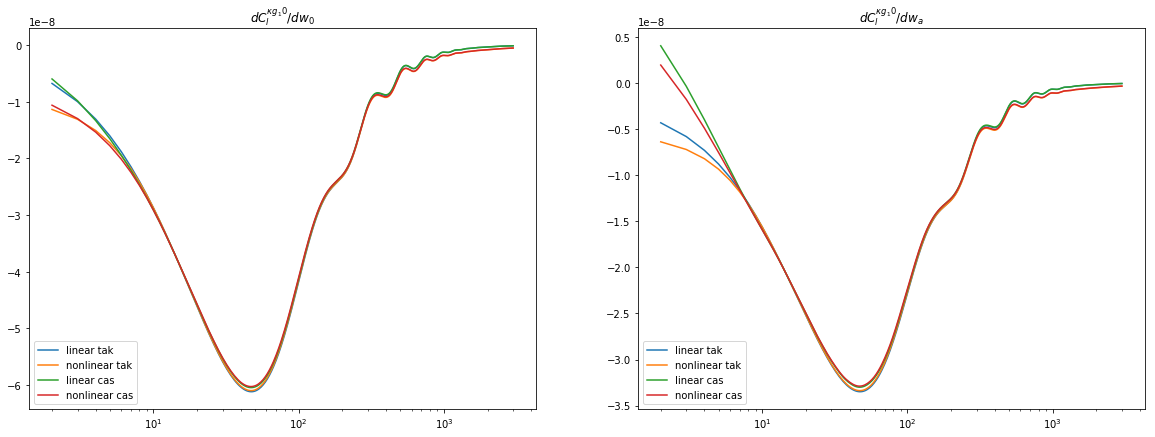

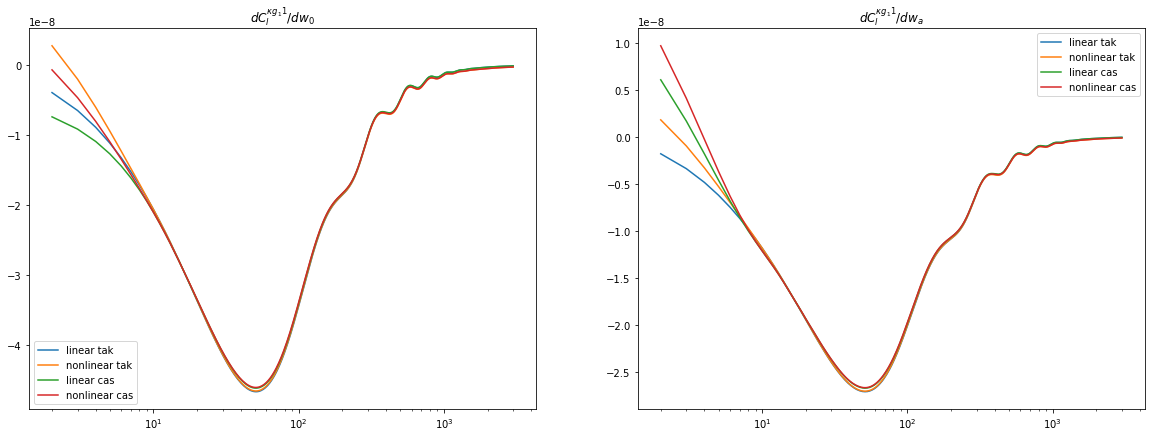

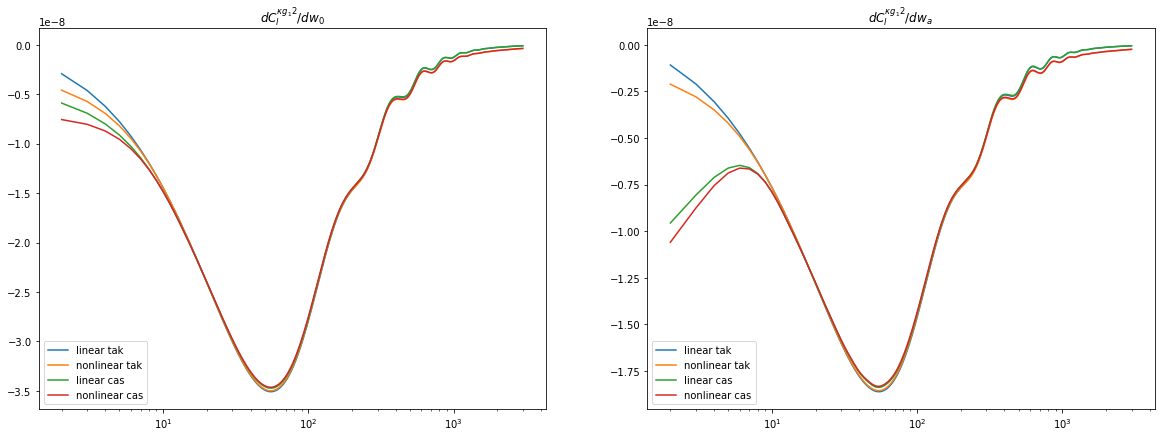

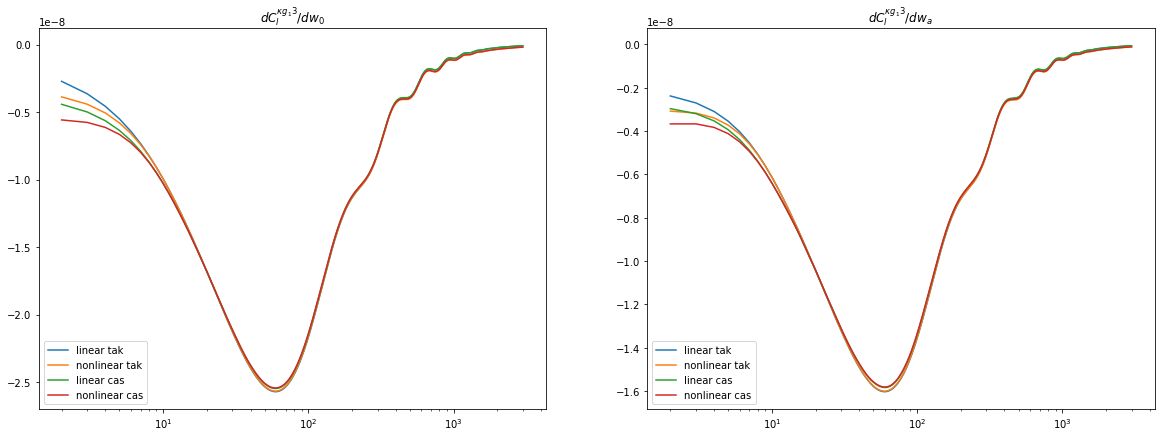

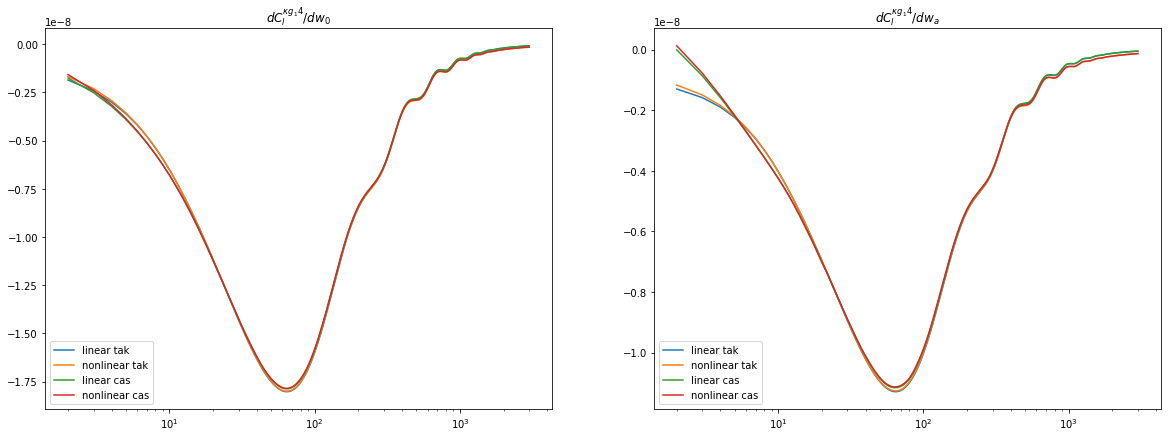

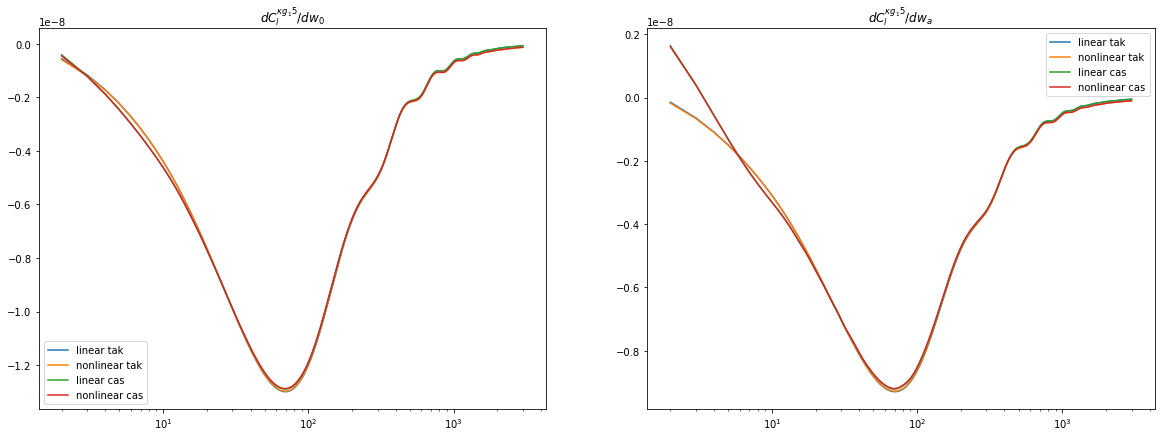

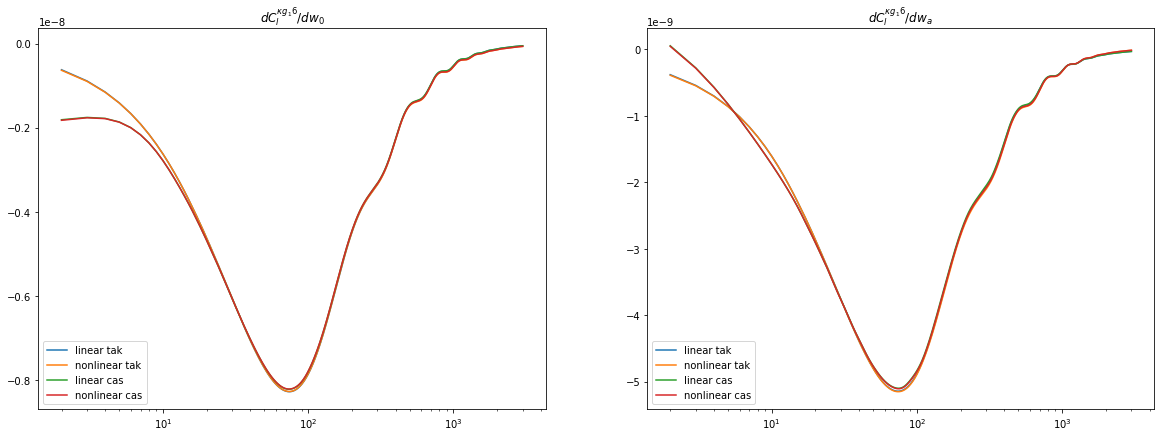

In [23]:
# look at some dCl/dw, dCl/dwa curves
w0Num = 7; waNum = 8
for specNum in range(nToPlot):
    fig = plt.figure(figsize=(20, 7))
    
    plt.subplot(1, 2, 1)
    plt.semilogx(ells,Fobj2.dClVecs[specNum,w0Num],label='linear tak')
    plt.semilogx(ells,Fobj4.dClVecs[specNum,w0Num],label='nonlinear tak')
    plt.semilogx(ells,dClVecs2[specNum,w0Num],label='linear cas')
    plt.semilogx(ells,dClVecs4[specNum,w0Num],label='nonlinear cas')
    plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_0$'.format(specNum))
    #plt.show()
    
    plt.subplot(1, 2, 2)
    plt.semilogx(ells,Fobj2.dClVecs[specNum,waNum],label='linear tak')
    plt.semilogx(ells,Fobj4.dClVecs[specNum,waNum],label='nonlinear tak')
    plt.semilogx(ells,dClVecs2[specNum,waNum],label='linear cas')
    plt.semilogx(ells,dClVecs4[specNum,waNum],label='nonlinear cas')
    plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_a$'.format(specNum))
    plt.show()
    

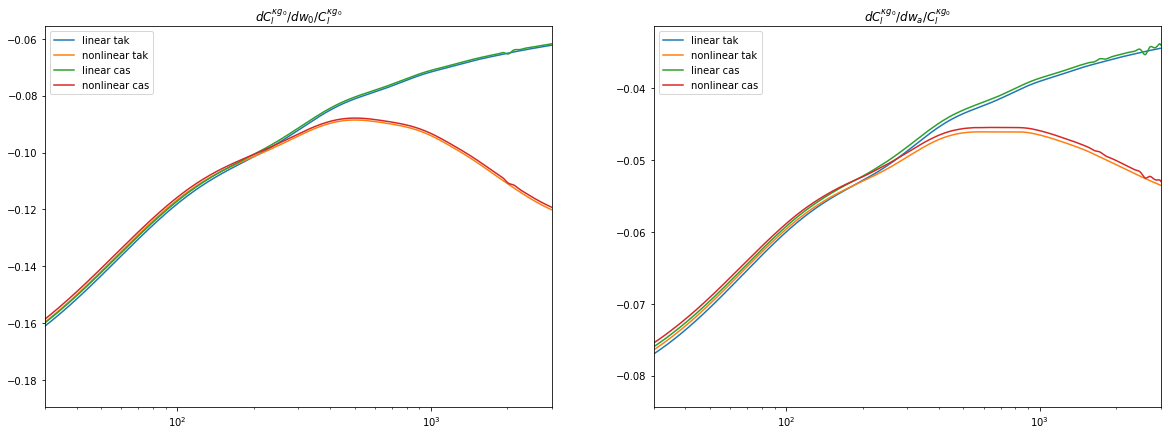

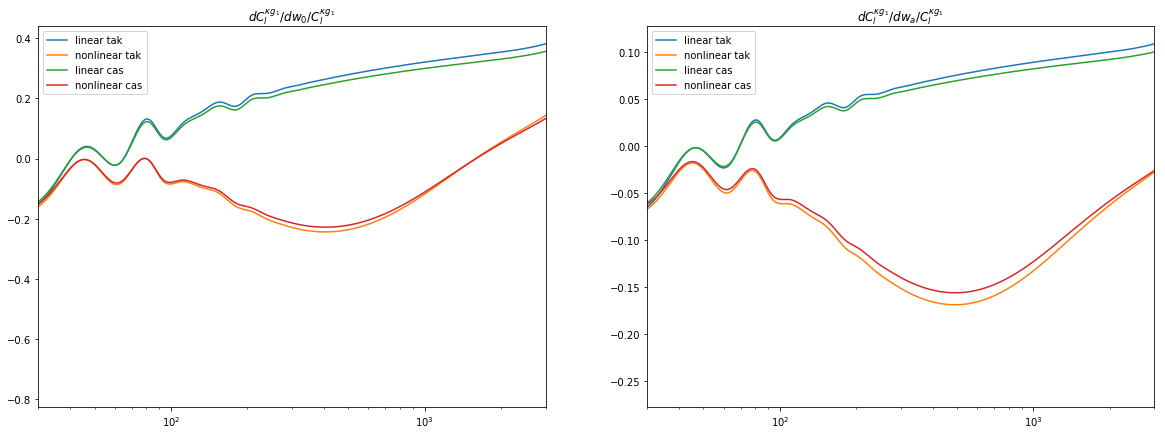

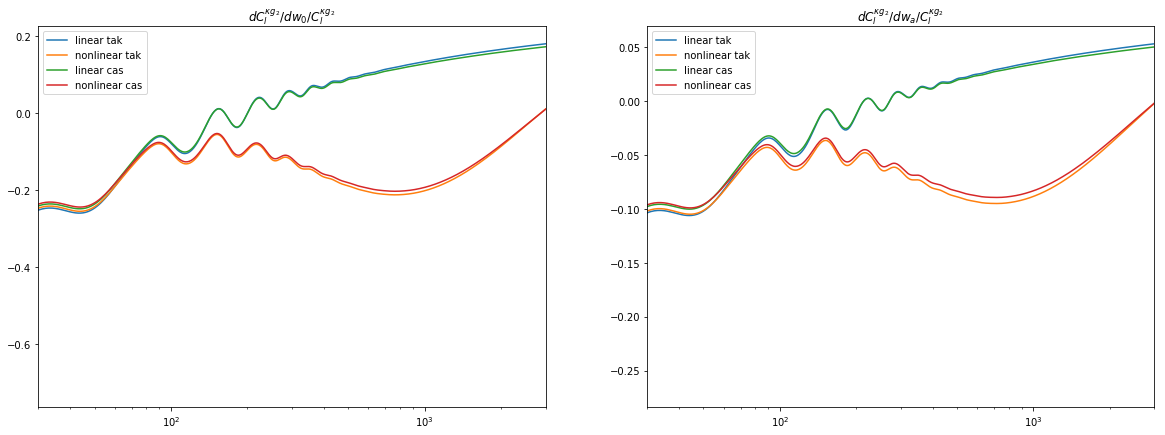

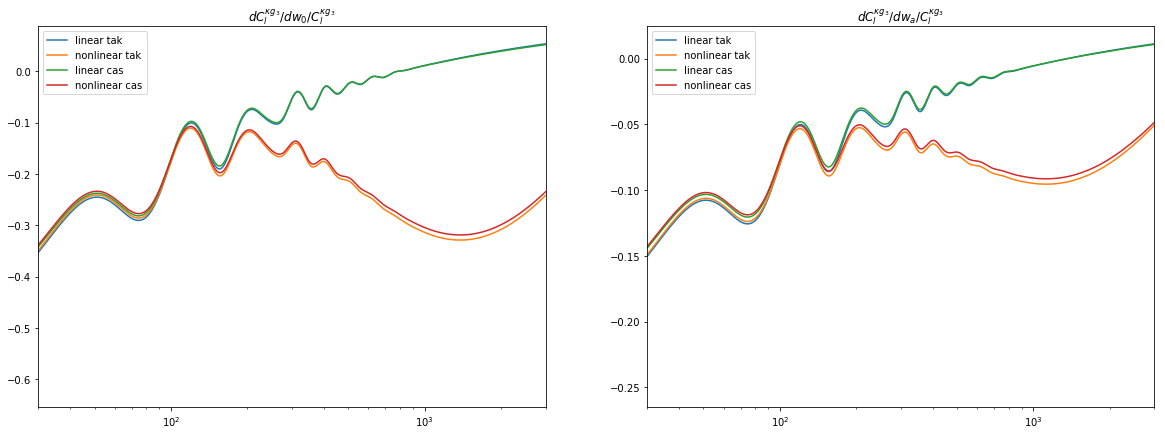

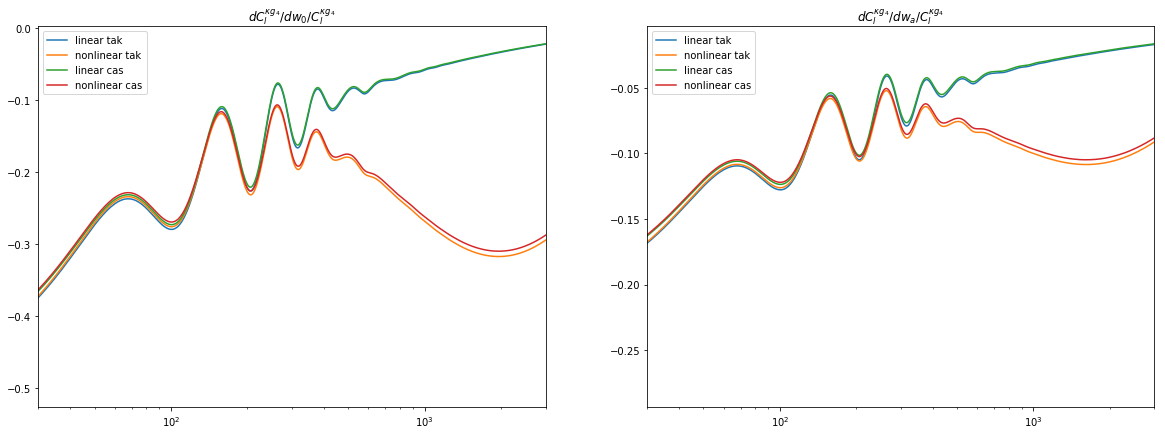

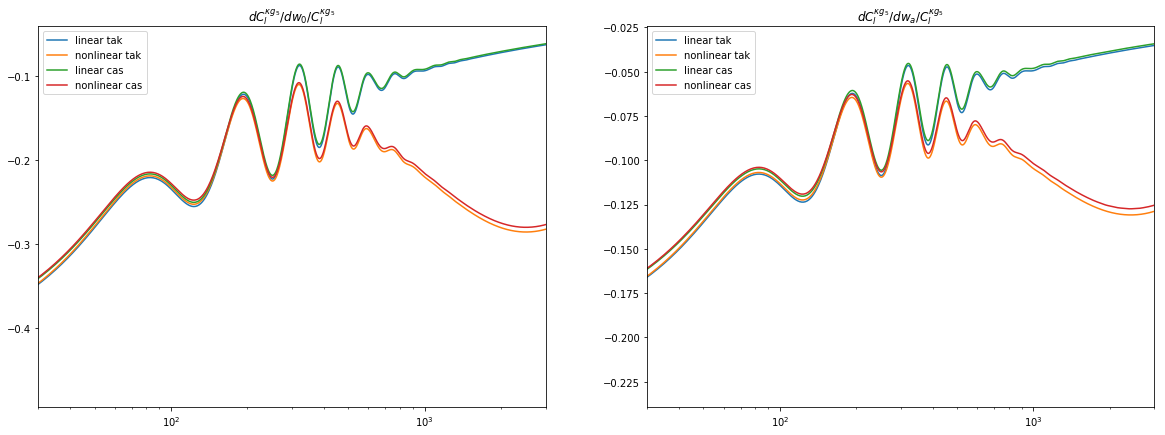

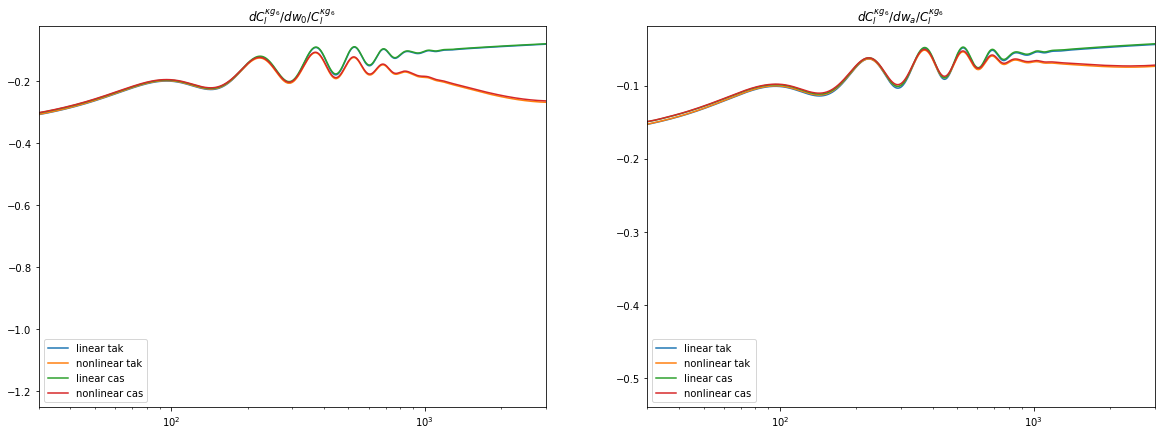

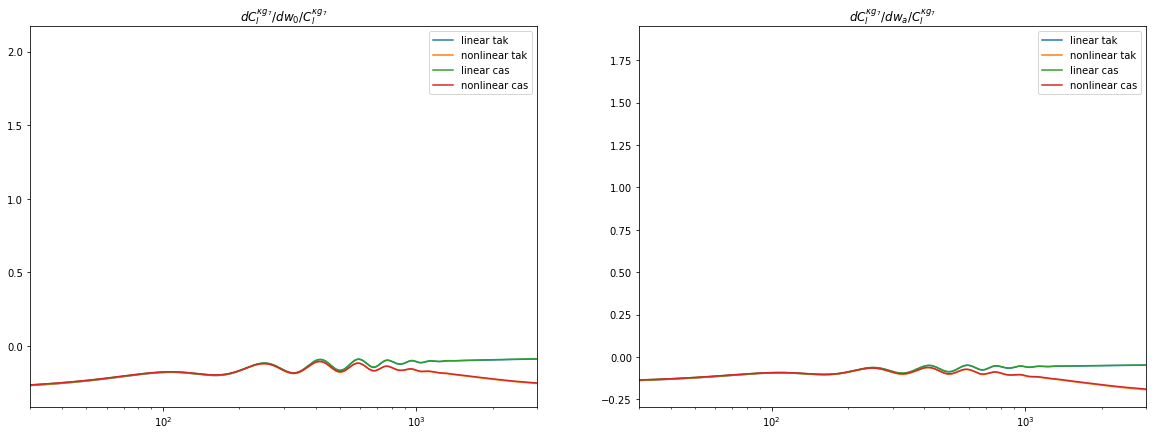

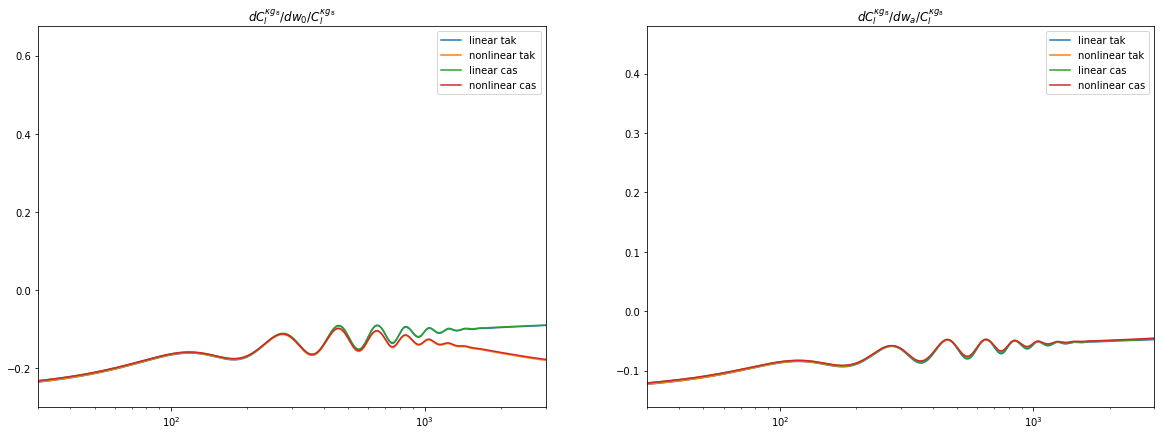

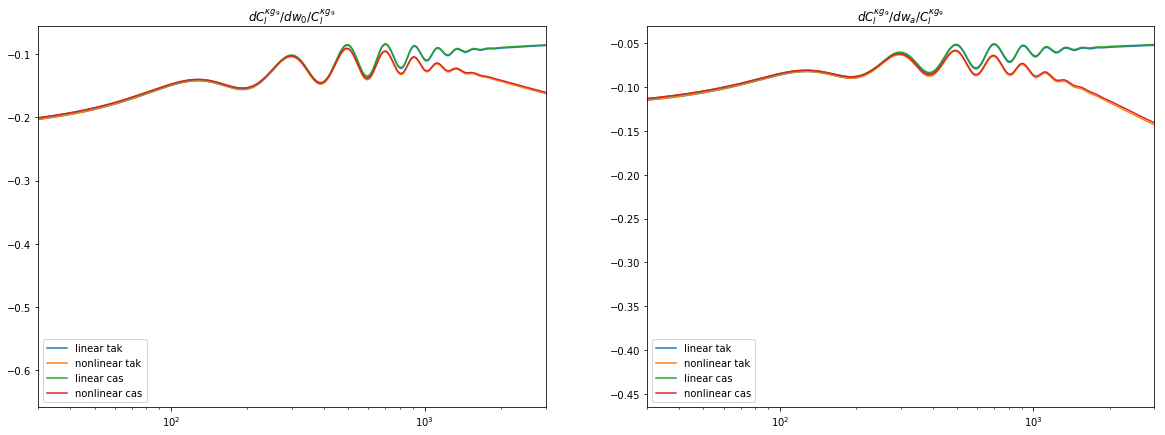

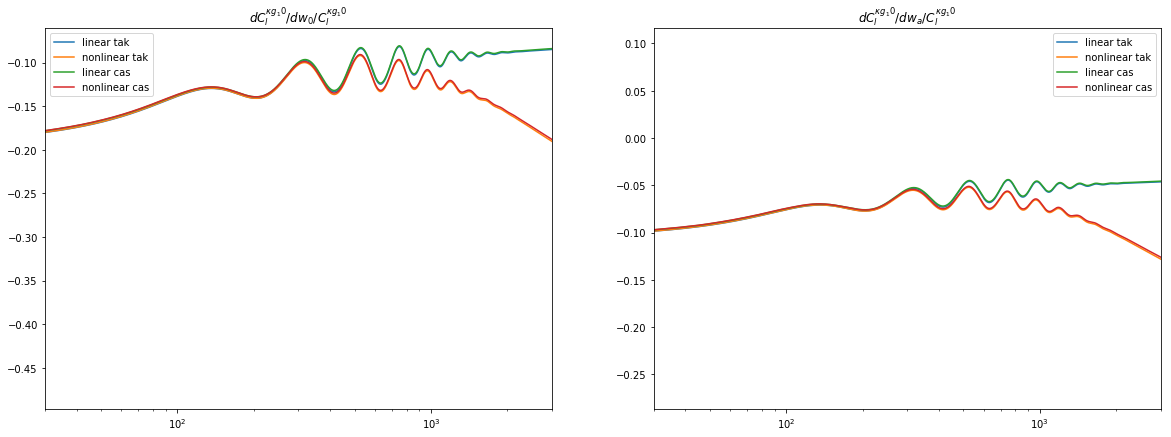

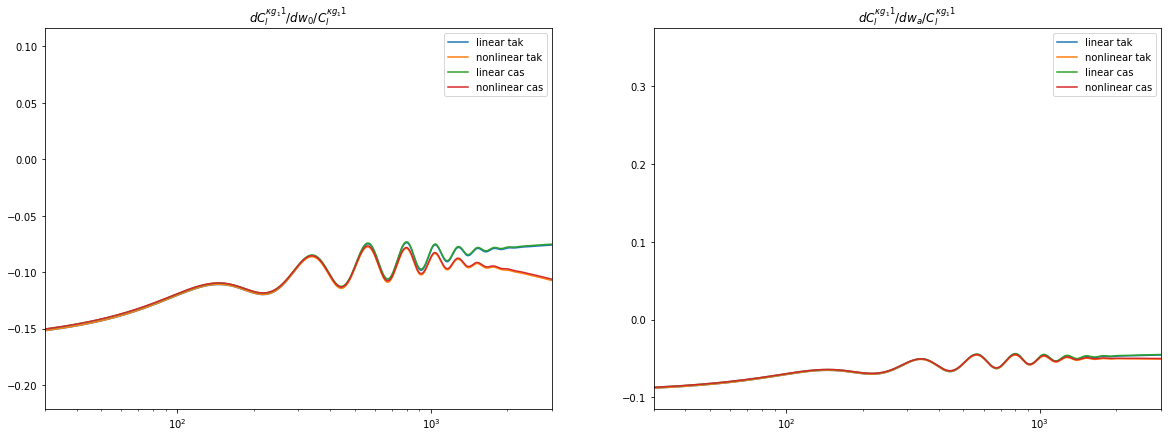

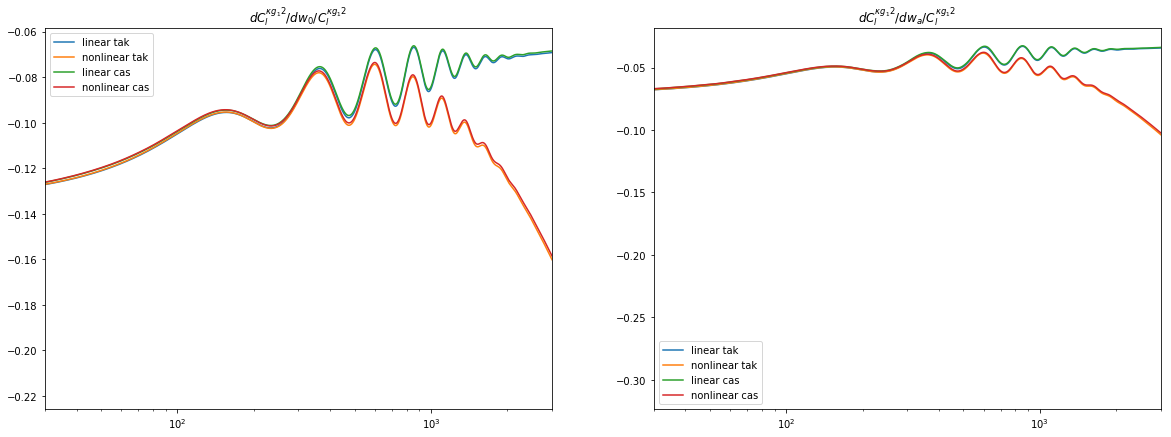

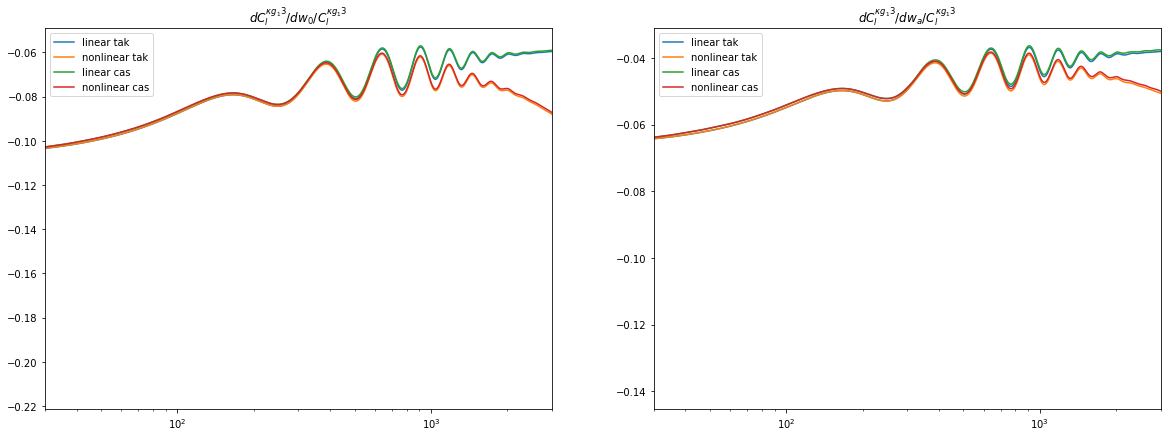

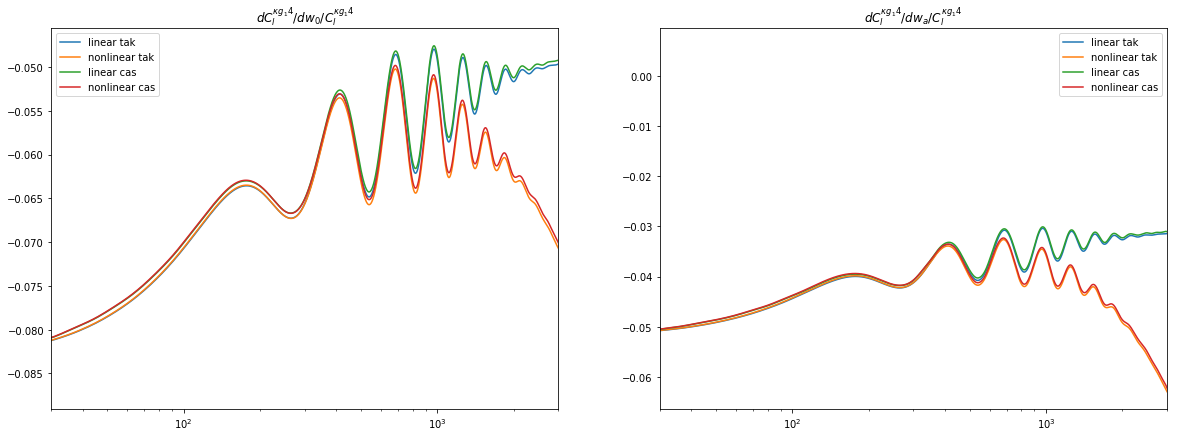

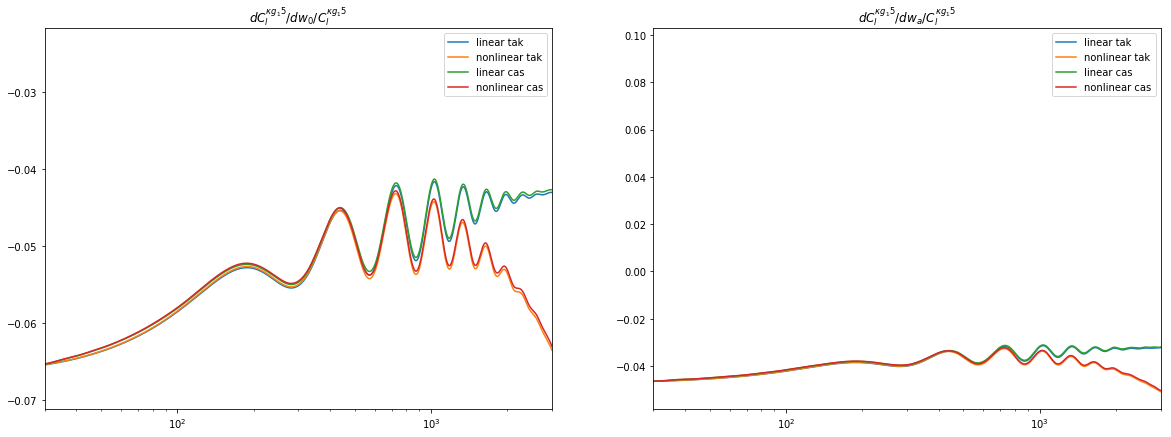

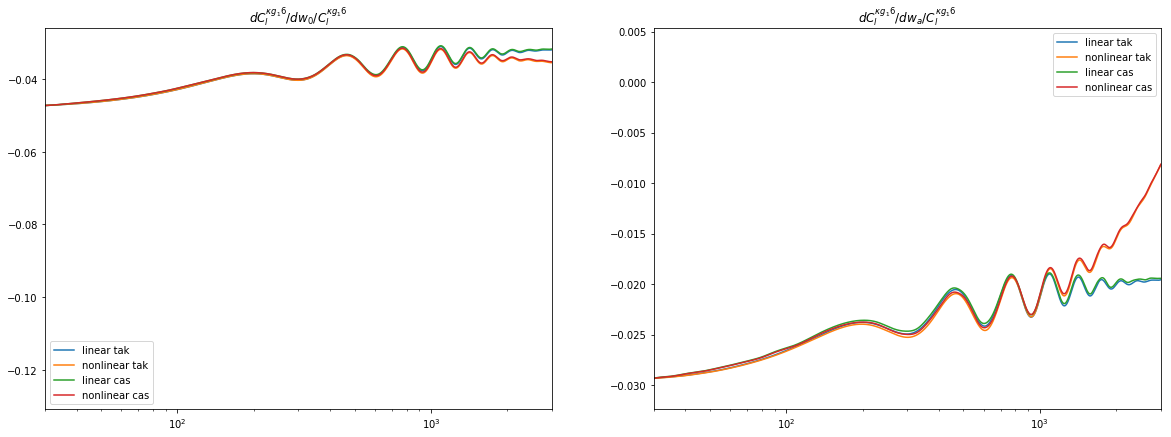

In [24]:
# same but dCl/dw /Cl
# look at some dCl/dw, dCl/dwa curves
w0Num = 7; waNum = 8
for specNum in range(nToPlot):
    fig = plt.figure(figsize=(20, 7))
    
    plt.subplot(1, 2, 1)
    plt.semilogx(ells,Fobj2.dClVecs[specNum,w0Num]/Fobj2.crossCls[0,specNum],label='linear tak')
    plt.semilogx(ells,Fobj4.dClVecs[specNum,w0Num]/Fobj4.crossCls[0,specNum],label='nonlinear tak')
    plt.semilogx(ells,dClVecs2[specNum,w0Num]/Fobj2.crossCls[0,specNum],label='linear cas')
    plt.semilogx(ells,dClVecs4[specNum,w0Num]/Fobj4.crossCls[0,specNum],label='nonlinear cas')
    plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_0 / C_l^{{\kappa g_{0} }}$'.format(specNum))
    plt.xlim([30,3000])
    #plt.show()
    
    plt.subplot(1, 2, 2)
    plt.semilogx(ells,Fobj2.dClVecs[specNum,waNum]/Fobj2.crossCls[0,specNum],label='linear tak')
    plt.semilogx(ells,Fobj4.dClVecs[specNum,waNum]/Fobj4.crossCls[0,specNum],label='nonlinear tak')
    plt.semilogx(ells,dClVecs2[specNum,waNum]/Fobj2.crossCls[0,specNum],label='linear cas')
    plt.semilogx(ells,dClVecs4[specNum,waNum]/Fobj4.crossCls[0,specNum],label='nonlinear cas')
    plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_a / C_l^{{\kappa g_{0} }}$'.format(specNum))
    plt.xlim([30,3000])
    plt.show()
    

In [25]:
# get sigmas from original Fobjs to compare against
Fijkg2 = Fobj2.makeFisher(30)
FijTE2 = Fobj2.makeFisher(30,TE=True)
Fijkg4 = Fobj4.makeFisher(30)
FijTE4 = Fobj4.makeFisher(30,TE=True)
print 'done.'

done.


In [26]:
def getSigmas(Fij):
    return np.sqrt(np.diag(np.linalg.inv(Fij)))
sigmas_kg2 = getSigmas(Fijkg2)
sigmas_TE2 = getSigmas(FijTE2)
sigmas_kg4 = getSigmas(Fijkg4)
sigmas_TE4 = getSigmas(FijTE4)
print 'done.'

done.


In [27]:
# Insert new quantities into Fobjs and get new sigmas
Fobj2.crossClsPlus = np.copy(crossClsPlus2)
Fobj2.crossClsMinus = np.copy(crossClsMinus2)
Fobj2.crossClsPPlus = np.copy(crossClsPPlus2)
Fobj2.crossClsPMinus = np.copy(crossClsPMinus2)
Fobj2.dClVecs = np.copy(dClVecs2)
Fobj2.dClVecsP = np.copy(dClVecsP2)

Fobj4.crossClsPlus = np.copy(crossClsPlus4)
Fobj4.crossClsMinus = np.copy(crossClsMinus4)
Fobj4.crossClsPPlus = np.copy(crossClsPPlus4)
Fobj4.crossClsPMinus = np.copy(crossClsPMinus4)
Fobj4.dClVecs = np.copy(dClVecs4)
Fobj4.dClVecsP = np.copy(dClVecsP4)

Fobj2.Fij = Fobj2.makeFisher(30)
Fobj2.FijTE = Fobj2.makeFisher(30,TE=True)
Fobj4.Fij = Fobj4.makeFisher(30)
Fobj4.FijTE = Fobj4.makeFisher(30,TE=True)


sigmas_kg2_new = getSigmas(Fobj2.Fij)
sigmas_TE2_new = getSigmas(Fobj2.FijTE)
sigmas_kg4_new = getSigmas(Fobj4.Fij)
sigmas_TE4_new = getSigmas(Fobj4.FijTE)
print 'done.'


done.


In [28]:
# print comparisons
from prettytable import PrettyTable
paramList = Fobj2.paramList

print 'kg linear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_kg2[i]
    Bi = sigmas_kg2_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kg nonlinear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_kg4[i]
    Bi = sigmas_kg4_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'TE linear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas_TE2[i]
    Bi = sigmas_TE2_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'TE nonlinear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas_TE4[i]
    Bi = sigmas_TE4_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

kg linear
+---------------+---------------+------------+---------------+
|   Parameter   | sigmas_before | sigmas_new | percent diff. |
+---------------+---------------+------------+---------------+
|     ombh2     |    0.000741   |  0.000741  |    -0.0265    |
|     omch2     |    0.00205    |  0.00205   |    -0.0711    |
| cosmomc_theta |    2.91e-05   |  2.91e-05  |     0.0423    |
|       As      |    2.78e-11   |  2.78e-11  |     0.119     |
|       ns      |    0.00261    |   0.0026   |    -0.0736    |
|      tau      |      6.75     |    6.82    |     0.995     |
|      mnu      |     0.0391    |   0.039    |     -0.258    |
|       w       |     0.0784    |   0.0786   |     0.227     |
|       wa      |     0.226     |   0.229    |      1.21     |
|      bin1     |    0.00525    |  0.00541   |       3.1     |
|      bin2     |    0.00497    |  0.00509   |      2.32     |
|      bin3     |    0.00552    |   0.0056   |       1.5     |
|      bin4     |    0.00637    |  0.00645   

In [29]:
# check combined kgTE
def getFijSum(Fijkg,FijTE,nCosParams):
    FijSum = np.copy(Fijkg)
    FijSum[:nCosParams,:nCosParams] += np.copy(FijTE)
    return FijSum

FijSum2 = getFijSum(Fijkg2,FijTE2,nCosParams)
FijSum2_new = getFijSum(Fobj2.Fij,Fobj2.FijTE,nCosParams)
FijSum4 = getFijSum(Fijkg4,FijTE4,nCosParams)
FijSum4_new = getFijSum(Fobj4.Fij,Fobj4.FijTE,nCosParams)

sigmas_sum2 = getSigmas(FijSum2)
sigmas_sum2_new = getSigmas(FijSum2_new)
sigmas_sum4 = getSigmas(FijSum4)
sigmas_sum4_new = getSigmas(FijSum4_new)
print 'done.'

done.


In [30]:
print 'kgTE linear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_sum2[i]
    Bi = sigmas_sum2_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kgTE nonlinear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_sum4[i]
    Bi = sigmas_sum4_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t


kgTE linear
+---------------+---------------+------------+---------------+
|   Parameter   | sigmas_before | sigmas_new | percent diff. |
+---------------+---------------+------------+---------------+
|     ombh2     |    7.17e-06   |  7.17e-06  |     0.0101    |
|     omch2     |    0.000199   |  0.000199  |    -0.0526    |
| cosmomc_theta |    2.78e-07   |  2.77e-07  |     -0.115    |
|       As      |    1.42e-11   |  1.42e-11  |     0.0776    |
|       ns      |    0.000787   |  0.000788  |     0.0683    |
|      tau      |    0.00359    |   0.0036   |     0.0741    |
|      mnu      |     0.0194    |   0.0193   |     -0.296    |
|       w       |     0.055     |   0.0556   |      1.12     |
|       wa      |     0.141     |   0.143    |      1.43     |
|      bin1     |    0.00244    |  0.00246   |      1.15     |
|      bin2     |    0.00264    |  0.00262   |     -0.865    |
|      bin3     |    0.00321    |  0.00317   |     -1.11     |
|      bin4     |    0.00365    |  0.00363 

In [31]:
# Save the modified Fisher Objects

filehandler_lin = open('Fisher_7_16O_dP.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

#filehandler_lin = open('Fisher_7_16N_dP.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

filehandler_nln = open('Fisher_7_16M_dP.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

#filehandler_nln = open('Fisher_7_16Ln0_dP.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 ('n0' indicates fix)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version



pickle.dump(Fobj2,filehandler_lin)
pickle.dump(Fobj4,filehandler_nln)
filehandler_lin.close()
filehandler_nln.close()
print 'done.'


done.


In [32]:
# check affect of fixing wa
# define row,col deleting function
def fixParam(Fij,pNum):
    return np.delete(np.delete(Fij,pNum,0),pNum,1)
waIndex = 8

FijSum2_nowa = fixParam(FijSum2,waIndex)
FijSum2_new_nowa = fixParam(FijSum2_new,waIndex)
FijSum4_nowa = fixParam(FijSum4,waIndex)
FijSum4_new_nowa = fixParam(FijSum4_new,waIndex)

sigmas_sum2_nowa = getSigmas(FijSum2_nowa)
sigmas_sum2_new_nowa = getSigmas(FijSum2_new_nowa)
sigmas_sum4_nowa = getSigmas(FijSum4_nowa)
sigmas_sum4_new_nowa = getSigmas(FijSum4_new_nowa)
print 'done.'

done.


In [33]:
paramList = np.delete(paramList,waIndex)
print paramList

['ombh2' 'omch2' 'cosmomc_theta' 'As' 'ns' 'tau' 'mnu' 'w' 'bin1' 'bin2'
 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11' 'bin12'
 'bin13' 'bin14' 'bin15' 'bin16']


In [34]:
print 'kgTE linear, wa fixed'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_sum2_nowa[i]
    Bi = sigmas_sum2_new_nowa[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kgTE nonlinear, wa fixed'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_sum4_nowa[i]
    Bi = sigmas_sum4_new_nowa[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t


kgTE linear, wa fixed
+---------------+---------------+------------+---------------+
|   Parameter   | sigmas_before | sigmas_new | percent diff. |
+---------------+---------------+------------+---------------+
|     ombh2     |    7.17e-06   |  7.17e-06  |   -0.000469   |
|     omch2     |    0.000177   |  0.000177  |     0.0425    |
| cosmomc_theta |    2.58e-07   |  2.58e-07  |     0.0496    |
|       As      |    1.39e-11   |  1.39e-11  |     -0.139    |
|       ns      |    0.000768   |  0.000767  |    -0.0278    |
|      tau      |    0.00351    |  0.00351   |     -0.137    |
|      mnu      |     0.0185    |   0.0185   |     0.0304    |
|       w       |     0.0123    |   0.0128   |      3.59     |
|      bin1     |    0.00235    |  0.00234   |     -0.527    |
|      bin2     |     0.0026    |   0.0026   |     0.0298    |
|      bin3     |    0.00301    |  0.00301   |     0.104     |
|      bin4     |    0.00345    |  0.00346   |     0.101     |
|      bin5     |    0.00392    |

In [35]:
# Fixing wa has caused the "before" and "new" cases to converge, as expected.
# However, there is still discrepancy between the linear and nonlinear cases.
# However again, there has been no k-limit imposed on these and therefore ell goes well into the nonlinear regime.

In [3]:
# re-arrange pieces to fix earlier screw-up
"""
# load FisherMatrix objects
import FisherCl as fcl
import noiseCl as ncl
import crosspower as cp
import pickle

filehandler_lin_mixed = open('Fisher_7_16O_dP_mixed.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
filehandler_nln_mixed = open('Fisher_7_16M_dP_mixed.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
filehandler_lin_chi = open('Fisher_7_16Ochi.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
filehandler_nln_chi = open('Fisher_7_16Mchi.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,

# do two at a time
#Fobj_mixed = pickle.load(filehandler_lin_mixed) 
#Fobj_chi = pickle.load(filehandler_lin_chi) 

Fobj_mixed = pickle.load(filehandler_nln_mixed) 
Fobj_chi = pickle.load(filehandler_nln_chi) 
print 'files opened.'


Fobj_chi.crossClsPlus = Fobj_mixed.crossClsPlus
Fobj_chi.crossClsMinus = Fobj_mixed.crossClsMinus
Fobj_chi.dClVecs = Fobj_mixed.dClVecs
Fobj_chi.Fij = Fobj_mixed.Fij



# just do one that matches the two selected above
#filehandler_lin = open('Fisher_7_16Ochi_dP.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#pickle.dump(Fobj_chi,filehandler_lin)
#filehandler_lin.close()

filehandler_nln = open('Fisher_7_16Mchi_dP.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
pickle.dump(Fobj_chi,filehandler_nln)
filehandler_nln.close()
print 'done.'

"""


files opened.
done.
